In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
from pywaffle import Waffle
from sklearn.impute import SimpleImputer
import scipy.stats as sct
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

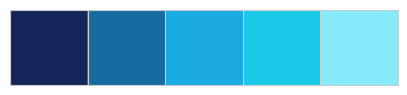

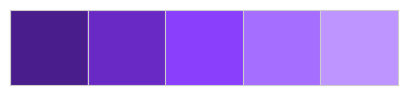

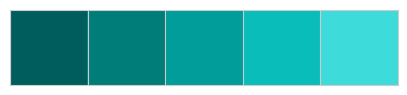

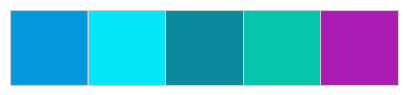

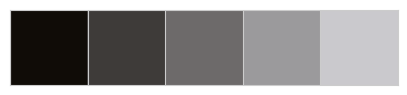

In [2]:
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [3]:
df = pd.read_csv('callcenter_case.csv')

In [4]:
#Configuração para poder apresentar todas as linhas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## **Entendimento do problema**

O entendimento do problema é de suma importância para a construção de um bom modelo. 

**Detecção de aderência em campanha de callcenter**

Você foi contratado por uma empresa do ramo de Call Center para desenvolver um modelo preditivo de detecção de aderência em uma campanha feita para um determinado banco.

Para esse trabalho iremos utilizar um dataset, enviado em anexo, que contém aproximadamente 41 mil linhas e 19 colunas. Esse dataset traz os registros pessoais dos clientes, como idade, profissão, educação entre outros, dados das campanha de telemarketing realizadas, como número de contatos, duração, alguns índices financeiros e a coluna aderencia_campanha, que mostra se o cliente aderiu ou não a campanha.

Você deverá construir um modelo para detecção de aderência dessa campanha, percorrendo todas as etapas da construção de um modelo de machine learning e documentando os passos seguidos e resultados obtidos em cada uma das etapas do processo, até chegar a etapa final dos resultados encontrados com a predição feita em cima do modelo.



**Utilização de aprendizagem supervisionada por clasificação**

## **Informações iniciais**

In [5]:
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', df.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
df.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 41188
Total Columns: 19
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        41188 non-null  int64  
 1   profissao                    40858 non-null  object 
 2   estado_civil                 41108 non-null  object 
 3   educacao                     39457 non-null  object 
 4   inadimplente                 32591 non-null  object 
 5   emprestimo_moradia           40198 non-null  object 
 6   emprestimo_pessoal           40198 non-null  object 
 7   meio_contato                 41188 non-null  object 
 8   mes                          41188 non-null  object 
 9   dia_da_semana                41188 non-null  object 
 10  duracao                      41188 non-null  i

## **Pré-processamento e manipulação dos dados**

In [6]:
#Ordenando e entendendo o dataset pela coluna idade
df.sample(20).sort_values(by='idade', ascending=False)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha
37799,54,aposentado,casado,curso_tecnico,NaN,nao,nao,celular,ago,ter,76,1,999,0,nao_existente,92.201,-31.4,0.838,nao
13575,54,desempregado,casado,graduacao_completa,NaN,nao,nao,telefone,jul,qui,106,1,999,0,nao_existente,93.918,-42.7,4.963,nao
31357,52,admin.,solteiro,NaN,NaN,nao,nao,celular,mai,qua,321,1,999,0,nao_existente,92.893,-46.2,1.334,nao
30159,51,servicos,casado,fundamental_6a,nao,nao,nao,celular,abr,qui,407,1,2,1,sucesso,93.075,-47.1,1.365,sim
5581,45,colarinho_azul,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,164,1,999,0,nao_existente,93.994,-36.4,4.857,nao
26581,43,servicos,divorciado,ensino_medio,nao,nao,nao,celular,nov,qui,329,1,999,0,nao_existente,93.200,-42.0,4.076,nao
28719,43,gerente,casado,NaN,NaN,nao,nao,celular,abr,qui,75,2,999,0,nao_existente,93.075,-47.1,1.410,nao
28435,41,admin.,casado,graduacao_completa,NaN,sim,sim,celular,abr,qui,240,3,999,0,nao_existente,93.075,-47.1,1.435,nao
24746,41,servicos,solteiro,curso_tecnico,nao,sim,nao,celular,nov,ter,41,2,999,0,nao_existente,93.200,-42.0,4.153,nao
30908,40,admin.,solteiro,curso_tecnico,nao,sim,nao,celular,mai,ter,43,1,999,1,fracasso,92.893,-46.2,1.344,nao


A ideia inicial foi entender de um modo geral, como a idade está sendo relevante para a aderência da campanha. E percebe-se que em sua maioria para essa amostra de dados, as pessoas não aderiram a campanha, indicando um desbalanceamento dos dados, porém irei deixar para verificar o desbalanceamento depois de verificar outros problemas em relação ao conjunto de dados.

In [7]:
df.describe()

,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


### **Verificar colunas**

In [8]:
df.columns

Index(['idade', 'profissao', 'estado_civil', 'educacao', 'inadimplente',
       'emprestimo_moradia', 'emprestimo_pessoal', 'meio_contato', 'mes',
       'dia_da_semana', 'duracao', 'qtd_contatos_campanha',
       'dias_ultimo_contato', 'qtd_contatos_total', 'campanha_anterior',
       'indice_precos_consumidor', 'indice_confianca_consumidor',
       'taxa_juros_media', 'aderencia_campanha'],
      dtype='object')

In [9]:
df.dtypes

idade                            int64
profissao                       object
estado_civil                    object
educacao                        object
inadimplente                    object
emprestimo_moradia              object
emprestimo_pessoal              object
meio_contato                    object
mes                             object
dia_da_semana                   object
duracao                          int64
qtd_contatos_campanha            int64
dias_ultimo_contato              int64
qtd_contatos_total               int64
campanha_anterior               object
indice_precos_consumidor       float64
indice_confianca_consumidor    float64
taxa_juros_media               float64
aderencia_campanha              object
dtype: object

In [10]:
df.dtypes.value_counts()

object     11
int64       5
float64     3
dtype: int64

#### **Alterando o tipo das colunas**

In [11]:
df['indice_confianca_consumidor'] = df['indice_confianca_consumidor'].astype(int)
df['taxa_juros_media'] = df['taxa_juros_media'].astype(int)
df['indice_precos_consumidor'] = df['indice_precos_consumidor'].astype(int)

### **Dados ausentes**

In [12]:
df.isnull().sum()

idade                             0
profissao                       330
estado_civil                     80
educacao                       1731
inadimplente                   8597
emprestimo_moradia              990
emprestimo_pessoal              990
meio_contato                      0
mes                               0
dia_da_semana                     0
duracao                           0
qtd_contatos_campanha             0
dias_ultimo_contato               0
qtd_contatos_total                0
campanha_anterior                 0
indice_precos_consumidor          0
indice_confianca_consumidor       0
taxa_juros_media                  0
aderencia_campanha                0
dtype: int64

Existem muitos dados nulos em relação ao tamanho do dataset nas colunas educação, profissão, inadimplente, emprestimo moradia, emprestimo pessoal e estado civil, que apesar de serem colunas categóricas, podemos realizar tranformações desses dados e precisar delas durante o estudo. 

Verificado que não existe problema em apagar os valores nulos dessas colunas, tendo em vista que tais variáveis não iram impactar tanto o modelo como as outras variáveis disponíveis, em seguida poderia apagar estes dados.

Todavida, irei aplicar a técnica de Simple Imputer para preencher os dados ausentes pelos valores que ocorre o maior número de vezes em uma determinada coluna. Essa abordagem é bastante interessante e aplicável para colunas categóricas, sendo este o problema dos dados ausentes.

In [13]:
#Criando objeto para substituir os valores ausentes
preenche_por_frequencia = SimpleImputer(strategy = "most_frequent")

imputer_frequencia = preenche_por_frequencia.fit_transform(df)

In [14]:
df = pd.DataFrame(imputer_frequencia, columns=df.columns)
df.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha
0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93,-36,4,nao
1,57,servicos,casado,ensino_medio,nao,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93,-36,4,nao
2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93,-36,4,nao
3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93,-36,4,nao
4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93,-36,4,nao


In [15]:
df.isnull().sum()

idade                          0
profissao                      0
estado_civil                   0
educacao                       0
inadimplente                   0
emprestimo_moradia             0
emprestimo_pessoal             0
meio_contato                   0
mes                            0
dia_da_semana                  0
duracao                        0
qtd_contatos_campanha          0
dias_ultimo_contato            0
qtd_contatos_total             0
campanha_anterior              0
indice_precos_consumidor       0
indice_confianca_consumidor    0
taxa_juros_media               0
aderencia_campanha             0
dtype: int64

### **Transformando colunas categóricas**

As colunas que possuem linhas com sim e não, consequentemente pode-se transformar facilmente em colunas com classes binárias para utilizar no processo de modelagem, então estas colunas são:

In [16]:
df.inadimplente.value_counts()

nao    41185
sim        3
Name: inadimplente, dtype: int64

In [17]:
colunas_classe_binaria = df[['inadimplente','emprestimo_moradia', 'emprestimo_pessoal', 'aderencia_campanha']].copy()

In [18]:
# Definindo as classes
sim_nao_map = {'sim': 1, 'nao': 0}

In [19]:
# Aplicando o mapeamento ao dataset com a função map
for coluna in colunas_classe_binaria:
    df[coluna] = df[coluna].map(sim_nao_map)

Por outro lado, apesar de não ter classificação dos registros como sim ou não, as colunas de meio de contato e campanha anterior, também podem ser transformar em classificação binaria e multiclassificação respectivamente.

In [20]:
def make_contato(x):
    if x == 'telefone':
        return 0
    else: #celular
        return 1

In [21]:
df['meio_contato'] = df['meio_contato'].apply(make_contato)

In [22]:
def make_campanha_anterior(x):
    if x == 'fracasso':
        return 0
    if x == 'sucesso':
        return 1
    else: #não existente
        return 2

In [23]:
df['campanha_anterior'] = df['campanha_anterior'].apply(make_campanha_anterior)

In [24]:
df.mes.unique()

array(['mai', 'jun', 'jul', 'ago', 'out', 'nov', 'dez', 'mar', 'abr',
       'set'], dtype=object)

As colunas categóricas dia da semana e mês que contém os dados diários e mensais também podem acabar sendo muito relevantes para este problema em questão, tendo em vista que em muito casos o dia ou mês pode ter um alto impacto para o cliente aderir uma campanha.

In [25]:
dias_semanais = {'seg': 1, 'ter':2, 'qua':3, 'qui':4, 'sex':5}
df['dia_da_semana'] = df['dia_da_semana'].map(dias_semanais)

In [26]:
meses = {'mar':3, 'abr':4, 'mai': 5, 'jun':6, 'jul':7, 'ago':8, 'set': 9, 'out':10, 'nov':11, 'dez': 12}
df['mes'] = df['mes'].map(meses)

In [27]:
df.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha
0,56,dona_casa,casado,fundamental_4a,0,0,0,0,5,1,261,1,999,0,2,93,-36,4,0
1,57,servicos,casado,ensino_medio,0,0,0,0,5,1,149,1,999,0,2,93,-36,4,0
2,37,servicos,casado,ensino_medio,0,1,0,0,5,1,226,1,999,0,2,93,-36,4,0
3,40,admin.,casado,fundamental_6a,0,0,0,0,5,1,151,1,999,0,2,93,-36,4,0
4,56,servicos,casado,ensino_medio,0,0,1,0,5,1,307,1,999,0,2,93,-36,4,0


Uma outra forma interessantes de se trabalhar com variáveis categóricas é através da utilização do One-hot encoding.

Com ele, uma variável categórica com  categorias é transformada em  novas variáveis binárias (0 ou 1), onde a presença do 1 (hot) significa que aquela observação pertence àquela categoria, e 0 (cold) que não pertence. 

O objetivo com o one-hot encoding é transformar determinada variável categórica em uma sequência de variáveis numéricas binárias, cada uma descrevendo uma classe da variável. Algumas variáveis que podemos aplicar está técnica e seja útil para o modelo são:

* estado_civil 
* profissão
* educação

Porém, está ténica só será aplicada as variáveis Educação e Profissão, para a variável estado civil não será necessário, então o próximo passo é treinar e transformar o encoder. O motivo é que possivelmente as variáveis educação e profissão tenha um impacto maior, tendo em vista que possivelmente existe uma tendência para as pessoas que tem uma educação e profissão melhores aderir mais a campanha. 

In [28]:
one_hot_encoder_educacao = OneHotEncoder(sparse=False, dtype=np.int)

In [29]:
df_encoded_educacao = one_hot_encoder_educacao.fit_transform(df[["educacao"]])

In [30]:
one_hot_encoder_profissao = OneHotEncoder(sparse=False, dtype=np.int)

In [31]:
df_encoded_profissao = one_hot_encoder_profissao.fit_transform(df[["profissao"]])

Através do atributo categories_ do encoder, pode-se visualizar como ficou as categorias de cada variável que foi transformada.

In [32]:
one_hot_encoder_educacao.categories_

[array(['analfabeto', 'curso_tecnico', 'ensino_medio', 'fundamental_4a',
        'fundamental_6a', 'fundamental_9a', 'graduacao_completa'],
       dtype=object)]

In [33]:
one_hot_encoder_profissao.categories_

[array(['admin.', 'aposentado', 'colarinho_azul', 'desempregado',
        'dona_casa', 'empreendedor', 'estudante', 'gerente', 'informal',
        'servicos', 'tecnico'], dtype=object)]

Agora posso criar as novas colunas que descrevem cada categoria. 

Repare que, para qualquer linha, apenas uma das colunas contém um 1, indicando a qual categoria aquela observação pertence. Isso acontece, obviamente, se as categorias forem mutuamente exclusivas (uma observação não pode pertencer a mais de uma categoria simultaneamente).

In [34]:
columns_encoded_educacao = one_hot_encoder_educacao.categories_[0]

df = pd.concat([df, pd.DataFrame(df_encoded_educacao, columns=columns_encoded_educacao)], axis=1)

df[['analfabeto','curso_tecnico','ensino_medio','fundamental_4a','fundamental_6a','fundamental_9a','graduacao_completa']].head(10)

,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0


In [35]:
columns_encoded_profissao = one_hot_encoder_profissao.categories_[0]

df = pd.concat([df, pd.DataFrame(df_encoded_profissao, columns=columns_encoded_profissao)], axis=1)

In [36]:
df[['admin.','aposentado','colarinho_azul','desempregado','dona_casa','empreendedor','estudante','gerente','informal','servicos','tecnico']].head()

,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


A maior parte da matriz retornada é composta por zeros, sendo apenas alguns elementos compostos de um.

Dizemos que essa matriz é esparsa. O que pode acabar sendo um grande desperdício de memória trabalhar diretamente como uma matriz esparsa assim. Por isso, existe o default do OneHotEncoder que retorna uma sparse matrix do NumPy, economizando espaço em memória, mas para este problema foi decidido não aplicar.

### **Como os dados estão distribuidos?**

#### **Teste de shapiro-wilk**

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que é abreviado para teste de normalidade. O intuito será verificar se algumas variáveis númericas vem ou não de uma distribuição normal.

A hipótese nula, é a normalidade dos dados. Se o valor-p for menor que o nível de significância , então temos evidências de que os dados não vêm de uma distribuição normal. Se o valor-p for maior que alpha, então não podemos afimar que os dados não vêm de uma distribuição normal (o que é sutilmente diferente de afirmar que eles vêm de uma distribuição normal).



Irei aplicar o teste de shapiro wilk e também verificar a distribuição dos dados para as colunas númericas que considerei importantes para o problema e consequentemente o desempenho do modelo.

In [37]:
def teste_shapiro_wilk(sample):
    # Retorne aqui o resultado da questão 1.

    # Teste de normalidade:
    stat, p = sct.shapiro(sample)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
    

In [38]:
df.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico
0,56,dona_casa,casado,fundamental_4a,0,0,0,0,5,1,261,1,999,0,2,93,-36,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,57,servicos,casado,ensino_medio,0,0,0,0,5,1,149,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,37,servicos,casado,ensino_medio,0,1,0,0,5,1,226,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,40,admin.,casado,fundamental_6a,0,0,0,0,5,1,151,1,999,0,2,93,-36,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,56,servicos,casado,ensino_medio,0,0,1,0,5,1,307,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
teste_shapiro_wilk(df['indice_precos_consumidor'])

statistics:0.7605612277984619, p-value:0.0


False

In [40]:
teste_shapiro_wilk(df['indice_confianca_consumidor'])

statistics:0.9215579032897949, p-value:0.0


False

In [41]:
teste_shapiro_wilk(df['taxa_juros_media'])

statistics:0.6410381197929382, p-value:0.0


False

<AxesSubplot:xlabel='taxa_juros_media', ylabel='Density'>

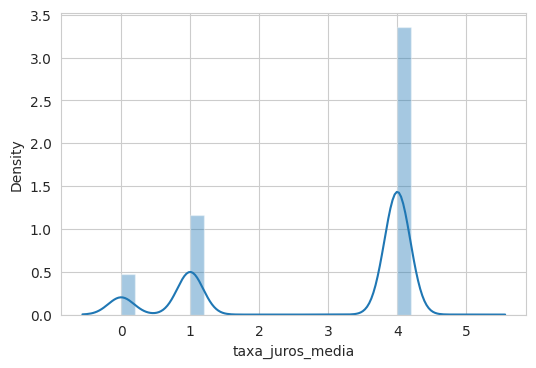

In [42]:
sns.distplot(df['taxa_juros_media'], bins=25)

<AxesSubplot:xlabel='indice_precos_consumidor', ylabel='Density'>

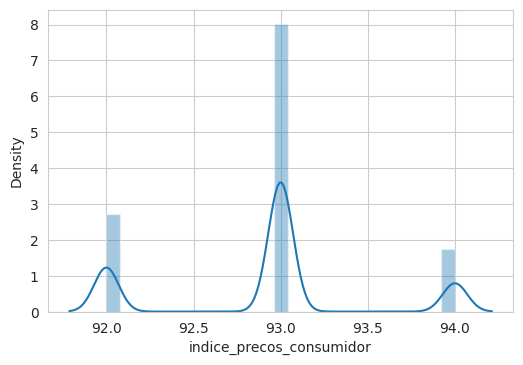

In [43]:
sns.distplot(df['indice_precos_consumidor'], bins=25)

<AxesSubplot:xlabel='indice_confianca_consumidor', ylabel='Density'>

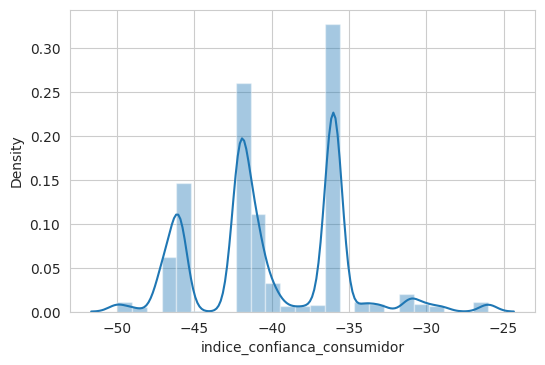

In [44]:
sns.distplot(df['indice_confianca_consumidor'], bins=25)

### *Notas*

* É possível observar que a média da taxa de juros das pessoas está mais concentrada em 4 e não está tão distribuida. 

Apesar do histograma apresentar uma distribuição que aparenta os dados está normalmente distribuidos. O teste de Shapiro-Wilk diz que os dados não são normalmente distruibuidos. Isso significa que é possivel de p-value ser maior que alpha, mostrando que há evidências de que a amostra não se trata de uma distruibição normal.

### **Normalizar ou padronizar os dados?**

Normalmente usamos a normalização quando você não sabe a distribuição dos dados, ou sabe que não é uma gaussiana, e é útil em algoritmos que não fazem suposições sobre a distribuição, como KNN ou redes neurais. Já a padronização a gente usa quando sabemos que a distribuição dos dados tem uma distribuição gaussiana, ou muito parecido com a curva da gaussiana.

Normalização é o processo de colocar uma variável numérica em uma escala [0,1] pré-determinada, geralmente , mas também é comum ser [-1,1].

Para colocar no intervalo [0,1], basta subtrair cada valor do valor mínimo e dividir pela diferença do valor máximo e mínimo:



Neste caso iremos normalizar os dados da coluna X que não estão distribuidos normalmente. Tendo em vista que são colunas númericas importantes para o problema em questão.

In [45]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
standard_scaler = StandardScaler()

In [46]:
df['taxa_juros_media_normalizado'] = minmax_scaler.fit_transform(df[['taxa_juros_media']])
df['indice_precos_consumidor_normalizado'] = minmax_scaler.fit_transform(df[['indice_precos_consumidor']])
df['indice_confianca_consumidor_normalizado'] = minmax_scaler.fit_transform(df[['indice_confianca_consumidor']])

In [47]:
print('Taxa de juros media normalizada: ', df['taxa_juros_media_normalizado'].min(), df['taxa_juros_media_normalizado'].max())
print('Indice de preços de consumidor normalizado: ', df['indice_precos_consumidor_normalizado'].min(), df['indice_precos_consumidor_normalizado'].max())
print('Indice de confiança de consumidor normalizado: ', df['indice_confianca_consumidor_normalizado'].min(), df['indice_confianca_consumidor_normalizado'].max())

Taxa de juros media normalizada:  0.0 1.0
Indice de preços de consumidor normalizado:  0.0 1.0
Indice de confiança de consumidor normalizado:  0.0 0.9999999999999998


<AxesSubplot:xlabel='taxa_juros_media_normalizado', ylabel='Density'>

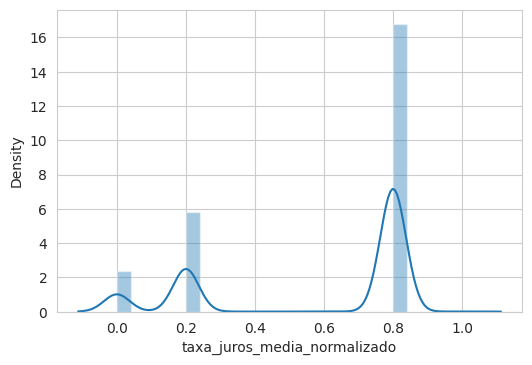

In [48]:
sns.distplot(df['taxa_juros_media_normalizado'], bins=25)

<AxesSubplot:xlabel='indice_precos_consumidor_normalizado', ylabel='Density'>

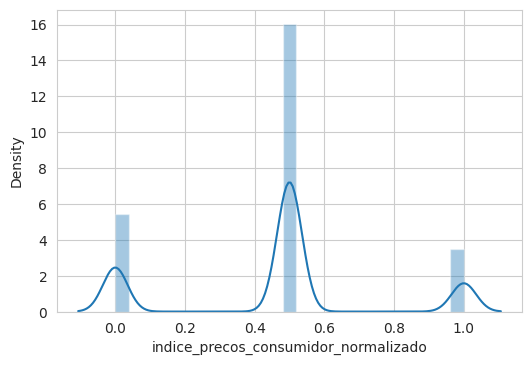

In [49]:
sns.distplot(df['indice_precos_consumidor_normalizado'], bins=25)

<AxesSubplot:xlabel='indice_confianca_consumidor_normalizado', ylabel='Density'>

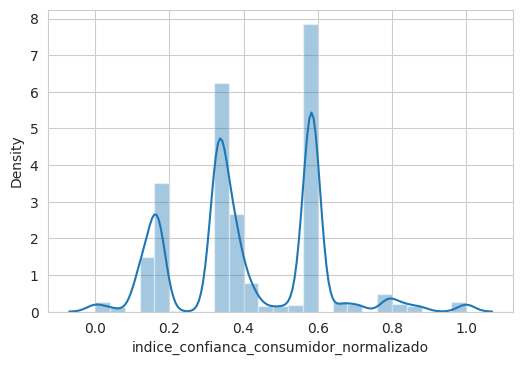

In [50]:
sns.distplot(df['indice_confianca_consumidor_normalizado'], bins=25)

Se comparar com as distribuições anteriores, é possível notar uma pequena diferença na distribuição dos dados.

### **Outliers**

Devido a algumas concatenações o tipo de dados acabou alterando, então decidi alterar o tipo das colunas novamente, apesar de não ser tão necessário.

In [51]:
df['indice_confianca_consumidor'] = df['indice_confianca_consumidor'].astype(int)
df['taxa_juros_media'] = df['taxa_juros_media'].astype(int)
df['indice_precos_consumidor'] = df['indice_precos_consumidor'].astype(int)

df['dias_ultimo_contato'] = df['dias_ultimo_contato'].astype(int)
df['qtd_contatos_campanha'] = df['qtd_contatos_campanha'].astype(int)
df['qtd_contatos_total'] = df['qtd_contatos_total'].astype(int)

df['idade'] = df['idade'].astype(int)

In [52]:
df.describe()

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000073,0.547878,0.151695,0.634748,6.607896,2.979581,2.567593,962.475454,0.172963,1.760197,92.922065,-40.116612,2.922453,0.112654,0.000437,0.127294,0.231014,0.101389,0.055647,0.146766,0.337453,0.261047,0.041760,0.224677,0.024619,0.025736,0.035350,0.021244,0.070992,0.034500,0.096363,0.163713,0.584491,0.461032,0.411808
std,10.42125,0.008534,0.497708,0.358729,0.481507,2.040998,1.411514,2.770014,186.910907,0.494901,0.623518,0.593828,4.657969,1.565326,0.316173,0.020901,0.333306,0.421486,0.301846,0.229242,0.353877,0.472846,0.439211,0.200042,0.417375,0.154962,0.158348,0.184665,0.144199,0.256814,0.182513,0.295092,0.370019,0.313065,0.296914,0.194082
min,17.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,92.000000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,1.000000,999.000000,0.000000,2.000000,93.000000,-42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.500000,0.333333
50%,38.00000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,2.000000,999.000000,0.000000,2.000000,93.000000,-41.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.500000,0.375000
75%,47.00000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,3.000000,999.000000,0.000000,2.000000,93.000000,-36.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.500000,0.583333
max,98.00000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,56.000000,999.000000,7.000000,2.000000,94.000000,-26.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Irei continuar a investigação para as mesmas variáveis númericas que foi verificado como os dados estavam distribuidos. 

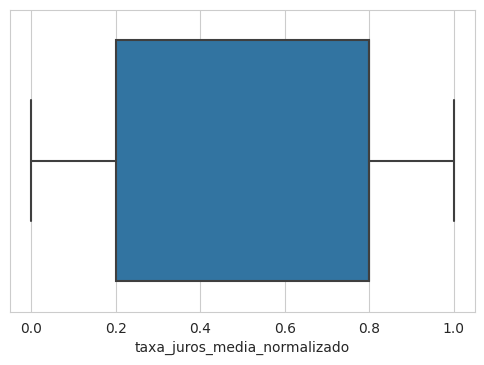

In [53]:
#Plotando gráfico de boxplot para o lado azul
sns.boxplot(x=df["taxa_juros_media_normalizado"], orient="vertical");

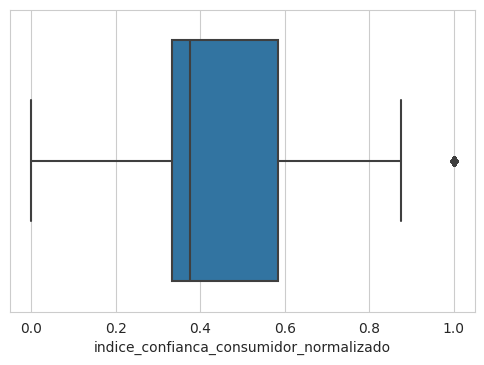

In [54]:
sns.boxplot(x=df["indice_confianca_consumidor_normalizado"], orient="vertical");

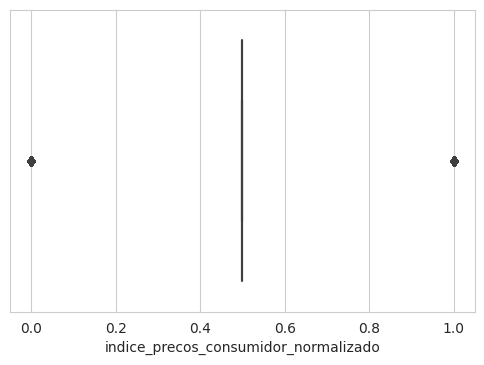

In [55]:
sns.boxplot(x=df["indice_precos_consumidor_normalizado"], orient="vertical");

Como estas variáveis através da interpretação do boxplot não aparenta ter outliers, seguiremos para a próxima etapa. Outras variáveis não foram avaliadas pois serão descartadas. 

### **Dados desbalanceados**

Para finalizar esta etapa de tratamento dos dados, eu poderia deletar algumas colunas, com o objetivo de trabalhar com mais facilidade e diminuir o tamanho do conjunto de dados, entretanto, acredito que todas elas serão muito utéis tanto para a análise exploratória, como o desenvolvimento do modelo. 

Também irei definir inicialmente as variáveis de entrada e a variável de saída, mas essas variáveis podem ser alteradas na etapa de seleção de variáveis e engenharia de recursos. O objetivo é apenas ter uma divisão inicial e corrigir problemas de desbalanceamento dos dados.

In [56]:
X = df.drop(['profissao', 'estado_civil', 'educacao'],1) #A variável targe por enquanto vai permanecer nos dados de entrada para usarmos na análise exploratória
y = df["aderencia_campanha"]

In [57]:
df['aderencia_campanha'].value_counts()

0    36548
1     4640
Name: aderencia_campanha, dtype: int64

In [58]:
aderencia_distribuicao = df['aderencia_campanha'].value_counts()

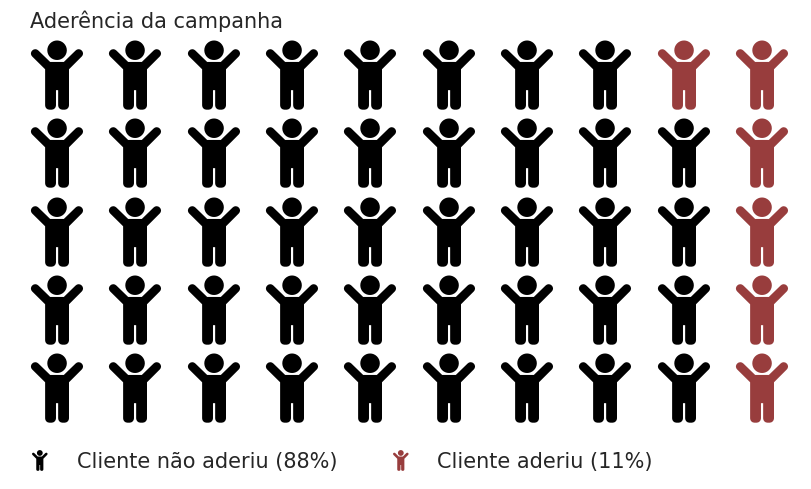

In [59]:
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=10,
                colors=("#000000", "#983D3D"),
                values=aderencia_distribuicao,
                title={
                'label': 'Aderência da campanha',
                'loc': 'left',
                'fontdict': {
                'fontsize': 15
                }},
                icons='child',
                font_size=50,
                legend={
                'loc': 'lower left',
                'bbox_to_anchor': (-0.04, -0.2),
                'ncol': len(aderencia_distribuicao),
                'framealpha': 0,
                'fontsize': 15
                },
                labels=['Cliente não aderiu (88%)', 'Cliente aderiu (11%)'],
                icon_legend=True, 
                figsize=(15, 5)
)
plt.tight_layout()
plt.show()

Nota-se então que os dados estão bastante desbalanceados, o que acaba influenciando negativamente o modelo para um lado, que seria os dados pessoas que não aderiram a campanha, por esse motivo existem algumas ténicas de balanceamento de dados.

#### **Smote**

SMOTE é uma das técnicas mais populares de reamostragem em casos de classes desbalanceadas. Trata-se de uma técnica de oversampling que adiciona dados sintéticos à classe minitoritária através de uma heurística relativamente simples.

O SMOTE pode ser pensado como um oversampling aleatório adicionado de uma perturbação direcionada. Isso evita os problemas de overfitting existentes no oversampling aleatório simples.

Esse algoritmo não está disponível por padrão no sklearn, mas pode ser encontrado nos seus projetos de contribuição na biblioteca imblearn.

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

Para definir o X e Y irei descartar apenas as variáveis de entrada que acredito não serem tão relevantes para o problema. E a variável de saída será a classe binária da coluna aderencia da campanha. 

In [61]:
smote = SMOTE(sampling_strategy="minority")

X_smote, y_smote = smote.fit_resample(X, y)

In [62]:
df.shape

(41188, 40)

In [63]:
X_smote.shape

(73096, 37)

Dessa forma a quantidade dados positivos e negativos se torna igual:

In [64]:
sum(y_smote == True)/sum(y_smote == False)

1.0

In [65]:
#SALVANDO BASE DE DADOS FINAL
df.to_csv("dados_tratados.csv",index= False)
X_smote.to_csv("X_dados_balanceados.csv",index= False)
y_smote.to_csv('y.csv', index=False)